# Phân tích dữ liệu Titanic

Link data set: [Titanic Data Set from Kaggle](https://www.kaggle.com/competitions/titanic/data?select=train.csv).

## 1.Import thư viện

In [86]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore") # Bỏ qua lỗi

pd.set_option('float_format', '{:2f}'.format) # Hiển thị đầy đủ số thay vì 1e5


## 2.Import dữ liệu từ file csv


In [3]:
df = pd.read_csv('Data\\titanic_train.csv')

In [4]:
#Kiểm tra dữ liệu
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S


## 3.Tiền xử lý dữ liệu



### 3.1.Kiểm tra dữ liệu:

In [5]:
# Kiểm tra dữ liệu null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

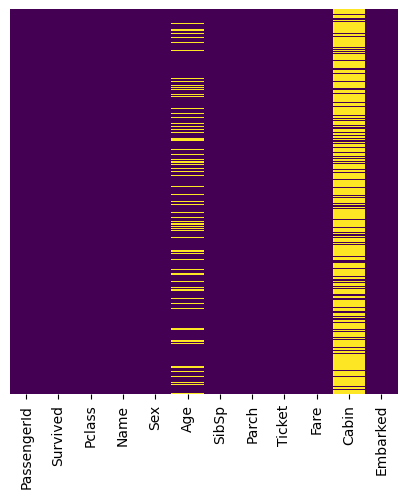

In [6]:
# Plot heatmap để xem các trường null
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

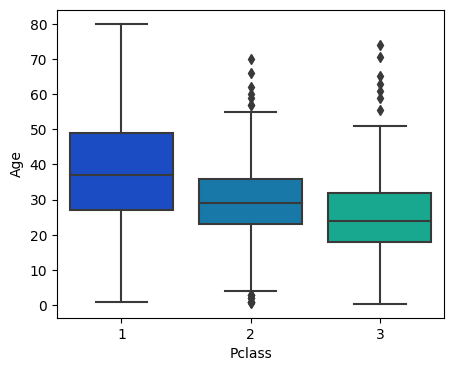

In [7]:
# Plot boxplot để xem outliers
plt.figure(figsize=(5, 4))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')
plt.show()

### 3.2.Xử lý dữ liệu để phân tích

In [8]:
# Lấy tuổi trung vị của mỗi Pclass
median1 = df[df['Pclass'] == 1]['Age'].median()
median2 = df[df['Pclass'] == 2]['Age'].median()
median3 = df[df['Pclass'] == 3]['Age'].median()

median1, median2, median3


(37.0, 29.0, 24.0)

In [9]:
# Fill các dữ liệu tuổi bị null
df.loc[(df['Pclass'] == 1) & (df['Age'].isna()), 'Age'] = median1
df.loc[(df['Pclass'] == 2) & (df['Age'].isna()), 'Age'] = median2
df.loc[(df['Pclass'] == 3) & (df['Age'].isna()), 'Age'] = median3


In [10]:
#Kiểm tra null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Xóa cột Cabin vì có quá nhiều dữ liệu bị null sẽ ảnh hướng đến quá trình phân tích
df.drop(columns='Cabin', inplace=True)

In [12]:
#Xóa 2 dòng có dữ liệu Embarked bị null
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)


In [13]:
# Kiểm tra null
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Kiểm tra kiểu dữ liệu của các attributes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
#Chuyển cột age thành kiểu dữ liệu int
df['Age'] =  df['Age'].astype('int')

In [16]:
#Xem lại dữ liệu
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.283300,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.100000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.050000,S


In [17]:
l = []
for s in df['Age']:
    if s < 18:
        l.append('< 18')
    elif s <= 60:
        l.append('18-60')
    else:
        l.append('> 60')

df['age_range'] = l
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250000,S,18-60
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.283300,C,18-60
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925000,S,18-60
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.100000,S,18-60
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.050000,S,18-60
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000000,S,18-60
885,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000000,S,18-60
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24,1,2,W./C. 6607,23.450000,S,18-60
887,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000000,C,18-60


## 4.Phân tích và trực quan hóa dữ liệu

### 4.1.Số tiền mà các hành khách phải bỏ ra để lên tàu Titanic

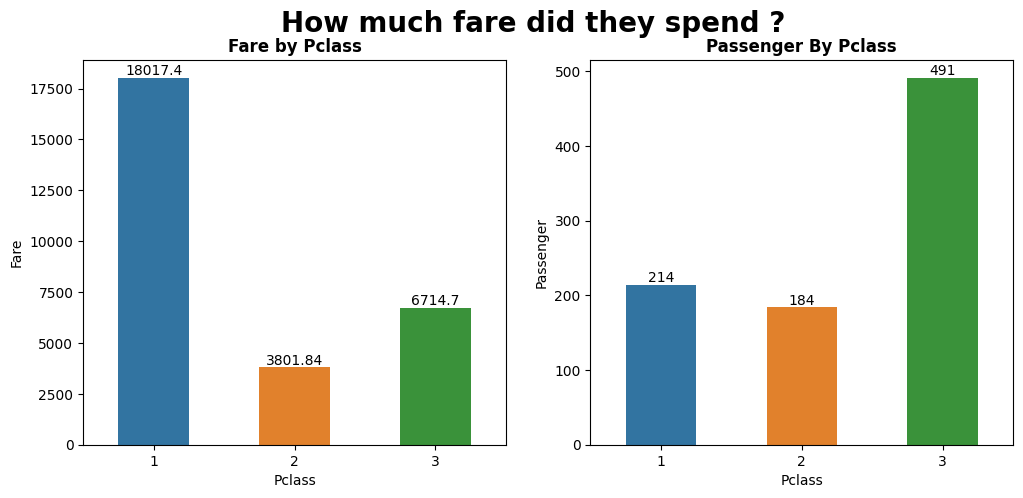

In [18]:
#1 bar 1 pie
plt.figure(figsize=(12,5))
data1 = df.groupby(['Pclass'])['Fare'].sum().reset_index()
plt.subplot(1,2,1)
ax = sns.barplot(
    data = data1,
    x = 'Pclass',
    y = 'Fare',
    width=0.5
)
for cont in ax.containers:
    plt.bar_label(cont)
plt.title('Fare by Pclass', fontweight = 'bold')

plt.subplot(1,2,2)
ax = sns.barplot(
    data = df.groupby(['Pclass'])['PassengerId'].count().reset_index(),
    x = 'Pclass',
    y = 'PassengerId',
    width= 0.5
)
for cont in ax.containers:
    plt.bar_label(cont)
plt.title('Passenger By Pclass', fontweight = 'bold')
plt.ylabel('Passenger')
plt.suptitle('How much fare did they spend ?', fontsize = 20, fontweight = 'bold')
plt.show()


+ Nhận xét:
    + Có 3 hạng ghế trên con tàu Titanic, bao gồm: 1 - Hạng thương gia, 2 - Hạng trung lưu, 3 - Hạng phổ thông.
    + Có tổng cộng 889 hành khách trên con tàu Titanic.
    + Số lượng người đi Pclass 3 chiếm tỉ lệ lớn nhất (491 - 55.23%)
    + Tuy nhiên số tiền bỏ ra của người đi Pclass 1 vượt trội hoàn toàn so với 2 Pclass còn lại (18017.4$ - 63.1%).


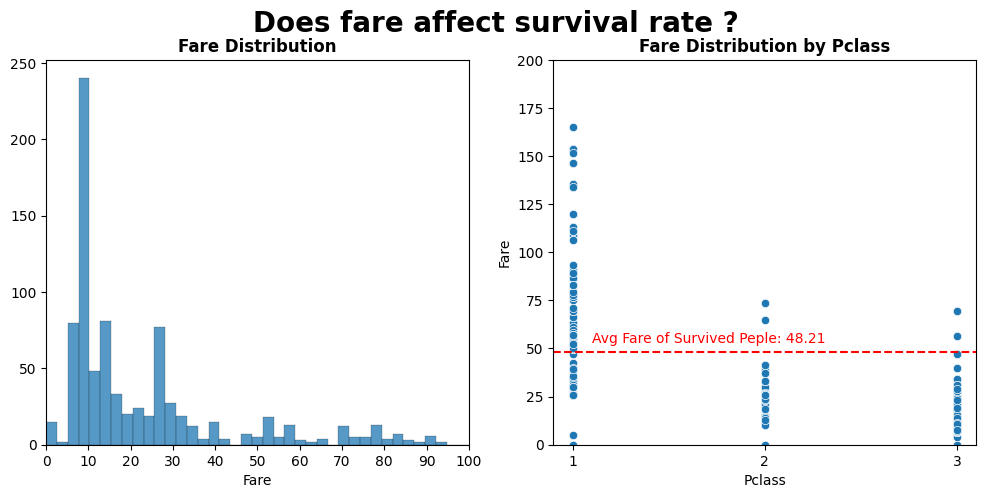

In [19]:
plt.figure(figsize=(12,5))
avg_suvived = df['Fare'][df['Survived']==1].mean()
plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x = 'Fare',
    bins = 200
)
plt.xlim(0,100)
plt.xticks(range(0,101,10))
plt.ylabel("")
plt.title('Fare Distribution', fontweight = 'bold')

plt.subplot(1,2,2)
sns.scatterplot(
    data = df,
    x = 'Pclass',
    y = 'Fare',

)
plt.ylim(0,200)
plt.xticks(range(1,4,1))
plt.axhline(y = avg_suvived, ls = "--", color = 'red')
plt.text(x=1.1,y=avg_suvived+5, s = f'Avg Fare of Survived Peple: {round(avg_suvived,2)}',color = 'red')
plt.title('Fare Distribution by Pclass', fontweight = 'bold')

plt.suptitle('Does fare affect survival rate ?', fontsize = 20, fontweight = 'bold')
plt.show()

+ Nhận xét: 
    + Tuy chỉ có 3 Pclass nhưng lại có rất nhiều giá vé khác nhau để lên tàu Titanic.
    + Số tiền mà hành khách phải bỏ ra chủ yếu nằm ở khoảng 5$ - 35$ và nhiều nhất là khoảng 8$ - 10$.
    + Vẫn có những hành khách bỏ ra số tiền lớn cho chuyến đi (>50$).
    + Số tiền trung bình của những hành khách sống sót trên con tàu là 48.21$.
    + Chỉ có 4 người (2 người của Pclass 2 và 2 người của Pclass 3) bỏ ra số tiền lớn hơn con số 48.21$, trong khi đó hầu hết là những hành khách thuộc về Pclass 1.
    + Ngược lại vùng từ 0$ - 10$ gần như chỉ tồn tại những hành khách thuộc Pclass 3.

#### Kết luận
- Tuy chỉ có 3 hạng vé phổ biến nhưng lại có rất nhiều mức giá khác nhau để lên tàu Titanic.
- Có những người mua vé hạng phổ thông nhưng phải trả mức giá bằng hoặc cao hơn hạng thương gia. Có thể những yếu tố khách quan như thời điểm mua vé, địa điểm mua vé, người bán vé,... đã gây ra sự không nhất quán về giá vé.
- Tuy nhiên, vì chỉ có một số ít trường hợp ngoại lệ, nên giá vé trung bình vẫn phân bố đúng theo hạng ghế trên tàu.

### 4.2.Độ tuổi trung bình của các hành khách trong sự kiện Titanic

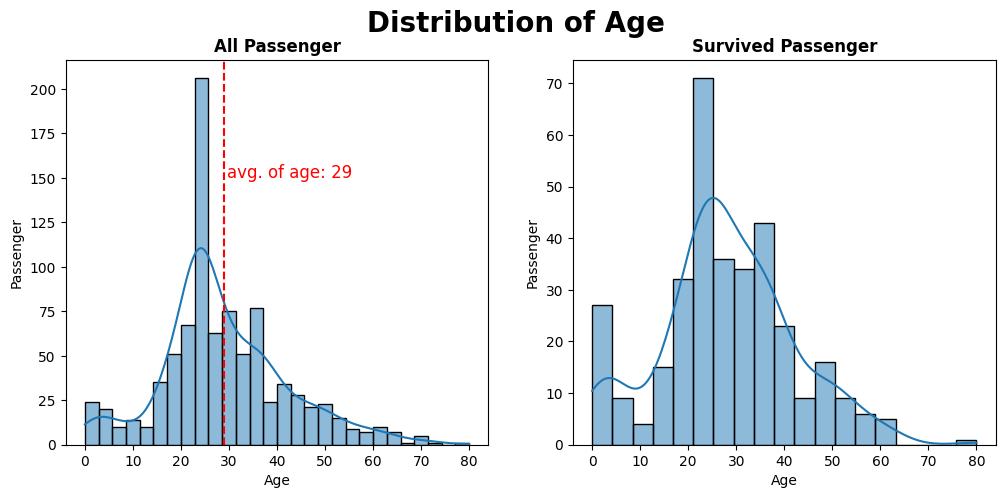

In [20]:
plt.figure(figsize=(12,5))
mean_age = df['Age'].mean()
plt.subplot(1,2,1)
sns.histplot(
    x = df['Age'],
    kde=True
)
plt.title('All Passenger', fontweight = 'bold')
plt.axvline(x=mean_age, ls='--', color = 'red')
plt.ylabel("Passenger")
plt.text(x = mean_age + 0.5,y = 150, s = f'avg. of age: {int(mean_age)}', fontsize = 12, color = 'red')

plt.subplot(1,2,2)
sns.histplot(
    x = df[df['Survived']==1]['Age'],
    kde=True
)
plt.title('Survived Passenger', fontweight = 'bold')
plt.ylabel("Passenger")

plt.suptitle('Distribution of Age', fontsize = 20, fontweight = 'bold')
plt.show()

+ Nhận xét:
    + Có hầu hết tất cả các lứa tuổi đi tàu Titanic.
    + Độ tuổi phổ biến của các hành khách là khoảng 18 - 40 tuổi, trong đó đông nhất là độ tuổi 24 - 26 tuổi.
    + Độ tuổi trung bình của các hành khách là 29 tuổi.
    + Đối với những hành khách còn sống, phân bố về độ tuổi gần như tương tự như phân bố của toàn bộ khách trên tàu, chỉ có một chút khác biệt đáng lưu ý ở độ tuổi từ 0 - 5 tuổi.

#### Kết luận
=> Tuổi tác không ảnh hưởng đến khả năng sống xót của các hành khách trên tàu Titanic trừ các em nhỏ dưới 5 tuổi hầu hết đều được cứu sống.

### 4.3.Sự ảnh hưởng của việc đi cùng người thân lên tàu Titanic

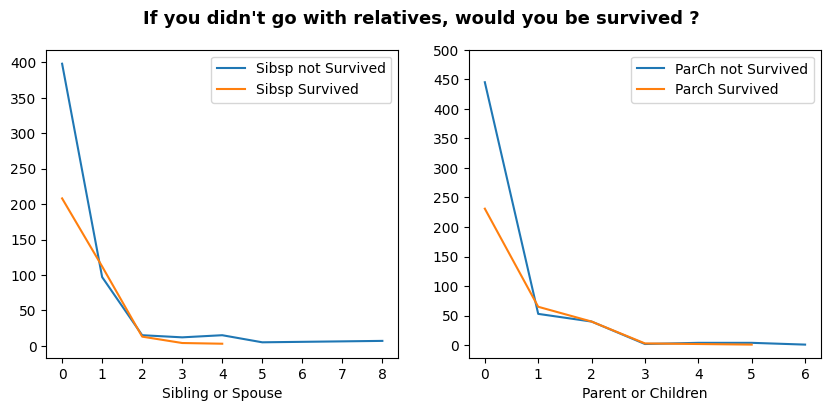

In [21]:
plt.figure(figsize=(10,4))
data2 = df[df['Survived']==0].groupby(['SibSp','Survived'])['PassengerId'].count().reset_index()
data3 = df[df['Survived']==0].groupby(['Parch','Survived'])['PassengerId'].count().reset_index()
data4 = df[df['Survived']==1].groupby(['SibSp','Survived'])['PassengerId'].count().reset_index()
data5 = df[df['Survived']==1].groupby(['Parch','Survived'])['PassengerId'].count().reset_index()

plt.subplot(1,2,1)
plt.plot(data2['SibSp'], data2['PassengerId'], label = 'Sibsp not Survived')
plt.plot(data4['SibSp'], data4['PassengerId'], label = 'Sibsp Survived')
plt.xlabel('Sibling or Spouse')
plt.xticks(range(0,9,1))
plt.legend()

plt.subplot(1,2,2)
plt.plot(data3['Parch'], data3['PassengerId'], label = 'ParCh not Survived')
plt.plot(data5['Parch'], data5['PassengerId'], label = 'Parch Survived')
plt.xlabel('Parent or Children')
plt.yticks(range(0,501,50))
plt.legend()

plt.suptitle("If you didn't go with relatives, would you be survived ?", fontweight = 'bold', fontsize = 13)
plt.show()

+ Nhận xét:
    + So sánh 2 biểu đồ trên, ta thấy nét tương đồng giữa việc đi với anh chị em, vợ chồng so với việc đi với cha mẹ hoặc con cái.
    + Đối với những người đi với người thân (từ 1 người trở lên), tỉ lệ sống và chết gần như là như nhau.
    + Đối với những người đi một mình, số người sống sót chỉ bằng một nữa số người chết.
    + Không có bất kì người nào đi với 4 anh chị em trở lên còn sống, trong khi đó nếu đi với số lượng lớn cha mẹ hoặc con cái tỉ lệ sống sót hoàn toàn cao hơn.

#### Kết luận:
- Vì tỉ lệ hành khách còn sống thấp hơn tỉ lệ hành khách đã chết nên ta hoàn toàn có thể nói việc đi với người thân có ảnh hưởng đến khả năng sống sót sau sự kiện Titanic.
- Những người đi với người thân có khả năng cao được nhường lên tàu cứu hộ và sống xót (gần như 100% tỉ lệ sống xót nếu là trẻ em dưới 5 tuổi), còn những người đi một mình phải tự tìm cách để sống sót. (Bao gồm cả yếu tố số lượng tàu cứu hộ là cố định)

### 4.4.Số lượng người sống xót sau sự kiện Titanic

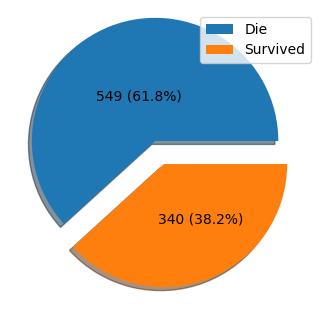

In [124]:
plt.figure(figsize=(4,4))
data6 = df.groupby(['Survived'])['PassengerId'].count().reset_index()
plt.pie(x = data6['PassengerId'], explode=[0.2,0], shadow=True)
plt.legend(labels = ['Die','Survived'])
total = data6['PassengerId'].sum()
for i, value in enumerate(data6['PassengerId']):
    percentage = value / total * 100
    plt.text(0.5*i-0.2, 0.55-i, f"{value} ({percentage:.1f}%)", ha='center', va='center')

plt.show()


+ Nhận xét:
    + Có tổng cộng 889 hành khách trên chuyến tàu Titanic.
    + Trong đó có 340 người sống sót (38.2%) và 549 người thiệt mạng (61.8%)

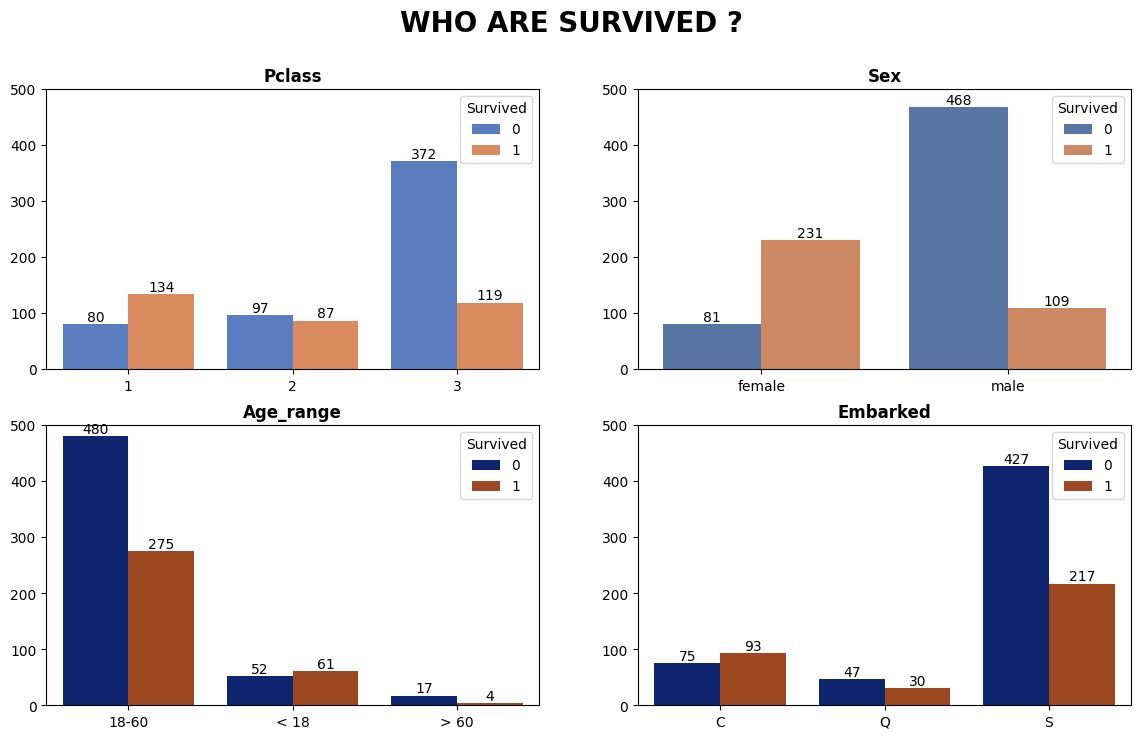

In [126]:
cate_cols = ['Pclass', 'Sex', 'age_range','Embarked']
available_palettes = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind','Set1','Set2','Set3']
plt.figure(figsize = (14, 8))

for i, col_name in enumerate(cate_cols):
    plt.subplot(2,2,i+1)
    ax = sns.barplot(
    data = df.groupby([f'{col_name}','Survived'])['PassengerId'].count().reset_index(),
    x = f'{col_name}',
    y = 'PassengerId',
    hue = 'Survived',
    palette= random.choice(available_palettes)
)
# bar label:
    for cont in ax.containers:
        plt.bar_label(cont)
    plt.title(f'{col_name.capitalize()}', fontweight = 'bold')
    plt.ylabel('')
    plt.ylim(0,500)
    plt.xlabel('')
plt.suptitle("WHO ARE SURVIVED ?", fontsize = 20, fontweight = 'bold')
plt.show()

+ Nhận xét:
    1. Theo hạng ghế
        * Chỉ có hạng thương gia là có số người sống sót nhiều hơn số người thiệt mạng đồng thời là hạng ghế có số lượng người sống sót lớn nhất.
        * Số lượng người thiệt mạng của hạng phổ thông nhiều gấp 3 lần số người sống sót ở hạng này và cũng là hạng ghế có số lượng người thiệt mạng lớn nhất.
    2. Theo giới tính
        * Số người sống sót là nữ nhiều gấp gần 3 lần số người thiệt mạng và nhiều gấp 2 lần số người sống sót là nam giới.
        * Ngược lại, số lượng người tử vong ở nam nhiều gấp 4 lần số người sống sót và gấp gần 6 lần số người tử vong là nữ.
    3. Theo độ tuổi
        * Chỉ có độ tuổi dưới 18 tuổi là có số lượng người sống sót cao hơn số lượng người tử vong.
        * Như đã phân tích ở trên, hầu hết trẻ em ở độ tuổi 0 - 5 tuổi đều sẽ được sống sót.
    4. Theo cảng khởi hành
        * Trên thực tế việc các hành khách xuất phát ở cảng nào không thực sự ảnh hưởng đến việc họ sống hay thiệt mạng.
        * Tuy nhiên, vì số lượng người sống sót ít hơn khá nhiều so với người thiệt mạng nhưng những người xuất phát từ cảng C vẫn có tỉ lệ sống sót cao hơn so với tử vong, điều đó chứng tỏ những người xuất phát từ cảng C rơi vào các trường hợp sau: phần lớn đi hạng thương gia, hầu hết là phụ nữ, gia đình có đông con nhỏ.


#### Kết luận: Những hành khách có khả năng sống sót cao nhất sau sự kiện Titanic là những người thuộc nhóm sau: 
    => Phụ nữ
    => Trẻ em
    => Người đi hạng thương gia

## 5.Ứng dụng machine learning để dự đoán tỉ lệ sống xót sau sự kiện Titanic

### 5.1.Xử lý dữ liệu để training model

In [24]:
# Copy data frame để không ảnh hưởng đến dữ liệu gốc
df2 = df.copy()
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250000,S,18-60
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.283300,C,18-60
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925000,S,18-60
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.100000,S,18-60
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.050000,S,18-60


In [25]:
# Set giới tính nam là 1 giới tính nữ là 0
df2.loc[df2['Sex'] == 'male', 'Sex'] = 1
df2.loc[df2['Sex'] == 'female', 'Sex'] = 0


In [26]:
# Kiểm tra dữ liệu
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.250000,S,18-60
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.283300,C,18-60
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925000,S,18-60
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.100000,S,18-60
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.050000,S,18-60


In [27]:
# Sử dụng get_dummies của thư viện pandas để transform dữ liệu embarked thành dạng dummies.
embark = pd.get_dummies(df2['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
df2 = pd.concat([df2, embark], axis=1)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.250000,S,18-60,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.283300,C,18-60,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925000,S,18-60,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.100000,S,18-60,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.050000,S,18-60,0,0,1


In [29]:
# Xóa các cột không phải dữ liệu số:
df2.drop(columns=['PassengerId','Embarked','Name','Ticket','age_range'], inplace=True)

In [30]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22,1,0,7.250000,0,0,1
1,1,1,0,38,1,0,71.283300,1,0,0
2,1,3,0,26,0,0,7.925000,0,0,1
3,1,1,0,35,1,0,53.100000,0,0,1
4,0,3,1,35,0,0,8.050000,0,0,1


In [31]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.003375,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409
std,0.486260,0.834700,13.217813,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


### 5.2.Training model

<img src="https://www.saedsayad.com/images/LogReg_1.png" width="600">


+ Threshold mặc định cho mỗi mô hình Logistic Regression là 0.5 và chỉ số này có thể thay đổi

#### 5.2.1.Cách 1

In [32]:
##Import thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
##Chia dữ liệu ra thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(df2.drop(columns='Survived'), 
                                                    df2['Survived'], 
                                                    test_size=0.2, 
                                                    random_state=101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((711, 9), (711,), (178, 9), (178,))

In [34]:
# Xem dữ liệu X_train
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
306,1,0,17,1,0,108.900000,1,0,0
228,3,0,24,3,1,25.466700,0,0,1
81,3,0,24,0,0,7.787500,0,1,0
352,3,1,25,1,0,17.800000,0,0,1
706,1,1,42,0,0,26.287500,0,0,1
...,...,...,...,...,...,...,...,...,...
575,2,0,34,0,0,13.000000,0,0,1
838,3,1,20,0,0,7.925000,0,0,1
337,3,1,45,0,0,8.050000,0,0,1
523,3,1,24,0,0,7.229200,1,0,0


In [35]:
# Train model
logreg1 = LogisticRegression()
logreg1.fit(X_train,y_train)

LogisticRegression()

In [36]:
# Dự đoán y_train và y_test dựa trên model đã train (trả về kết quả)
y_train_pred = logreg1.predict(X_train)
y_test_pred = logreg1.predict(X_test)

# Dự đoán y_train và y_test dựa trên model đã train (trả về xác suất)
y_train_pred_prop = logreg1.predict_proba(X_train)
y_test_pred_prop = logreg1.predict_proba(X_test)



In [37]:
# Xem 5 kết quả dự đoán mẫu
print('Result of ".predict(X_train)":', y_train_pred[:5], sep = '\n')
print('=='*30)
print('Result of ".predict_proba(X_train)":', y_train_pred_prop[:5], sep = '\n')


Result of ".predict(X_train)":
[1 0 1 0 0]
Result of ".predict_proba(X_train)":
[[0.04170478 0.95829522]
 [0.61403981 0.38596019]
 [0.29517995 0.70482005]
 [0.91641479 0.08358521]
 [0.64931622 0.35068378]]


+ Thay đổi threshold

In [38]:
# Thay đổi threshold thành 0.3 (chỉ cần dự đoán 30% người đó sống thì người đó sẽ sống)
(y_train_pred_prop>=0.3).astype('int')[:5]

array([[0, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1]])

In [39]:
# Xuất kết quả
y_train_pred2 = (y_train_pred_prop>=0.3).astype('int')[:, 1]
y_train_pred2[:5]

array([1, 1, 1, 0, 1])

+ Đánh giá các chỉ số của mô hình dự đoán

In [40]:
# Import các chỉ số đánh giá mô hình
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# Độ chính xác của tập train (tỉ lệ dự đoán đúng của mô hình trên tổng số kết quả dự đoán)
accuracy_score(y_train, y_train_pred)

0.8059071729957806

In [42]:
# Độ chính xác của tập test
accuracy_score(y_test, y_test_pred)

0.8202247191011236

In [43]:
# Tính toán confusion matrix
confusion_matrix(y_test, y_test_pred)

array([[98,  9],
       [23, 48]], dtype=int64)

In [44]:
# Chuẩn hóa confusion matrix
confusion_matrix(y_test, y_test_pred, normalize='true')


array([[0.91588785, 0.08411215],
       [0.32394366, 0.67605634]])

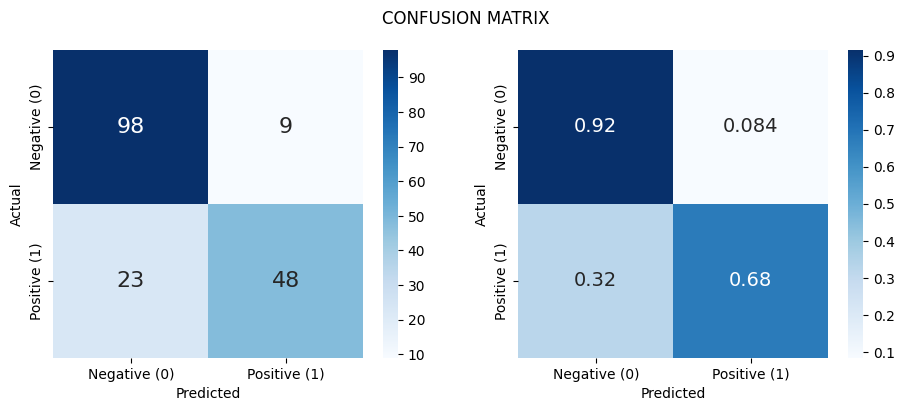

In [45]:
#Plot confusion matrix dựa trên kết quả dự đoán của model
plt.figure(figsize = (11, 4))
plt.subplot(121)
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

plt.subplot(122)
conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14})
plt.suptitle('CONFUSION MATRIX')
plt.show()

In [46]:
# Xem báo cáo phân loại
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.84      0.68      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



#### 5.2.2.Cách 2

In [47]:
# Kiểm tra dữ liệu
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22,1,0,7.250000,0,0,1
1,1,1,0,38,1,0,71.283300,1,0,0
2,1,3,0,26,0,0,7.925000,0,0,1
3,1,1,0,35,1,0,53.100000,0,0,1
4,0,3,1,35,0,0,8.050000,0,0,1


In [48]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.003375,0.524184,0.382452,32.096681,0.188976,0.086614,0.724409
std,0.486260,0.834700,13.217813,1.103705,0.806761,49.697504,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [49]:
# Kiểm tra dữ liệu cột Parch (số lượng cha mẹ hoặc con cái đi cùng)
df2["Parch"].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [50]:
# Kiểm tra dữ liệu cột SibSp (số lượng anh chị em hoặc vợ chồng đi cùng)
df2["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
# Xóa dữ liệu cột Parch và SibSp vì quá nhiều giá trị 0 ở 2 cột này dễ dẫn đến thiên lệch dữ liệu
df3 = df2.drop(columns = ['Parch','SibSp'])
df3.head() 

,Survived,Pclass,Sex,Age,Fare,C,Q,S
0,0,3,1,22,7.250000,0,0,1
1,1,1,0,38,71.283300,1,0,0
2,1,3,0,26,7.925000,0,0,1
3,1,1,0,35,53.100000,0,0,1
4,0,3,1,35,8.050000,0,0,1


👉 Use SMOTE OVERSAMPLING technique

<img src="https://www.researchgate.net/publication/347937180/figure/fig3/AS:973429209563136@1609095017080/Illustration-of-the-SMOTE-oversampling-approach.ppm" width="600">

In [52]:
X = df3.drop(columns='Survived')
y = df3['Survived']

In [53]:
X.shape, y.shape

((889, 7), (889,))

In [54]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [55]:
# Install imblearn library
! pip install imblearn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
from imblearn.over_sampling import SMOTE

# X và y là các feature và label của dữ liệu
smote = SMOTE(k_neighbors = 3, random_state=96)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [57]:
X_resampled.shape, y_resampled.shape

((1098, 7), (1098,))

In [58]:
# Check value count of label:
y_resampled.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [59]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=101,
                                                    stratify = y_resampled)

X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((878, 7), (878,), (220, 7), (220,))

In [60]:
# Load model:
logreg2 = LogisticRegression()
# Train model:
logreg2.fit(X_train1, y_train1)

LogisticRegression()

In [61]:
# Prediction on trainset and testset:
y_test_pred1 = logreg2.predict(X_test1)


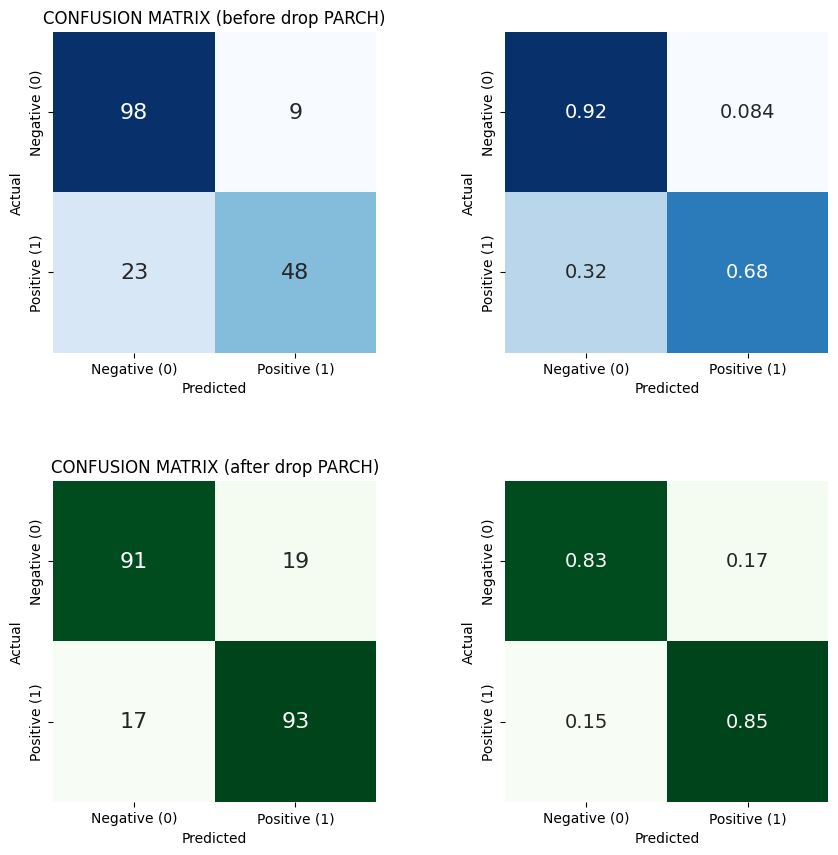

In [62]:
plt.figure(figsize = (10, 10))
# Plot before drop parch col:
plt.subplot(221)
conf_matrix = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar = False)
plt.title('CONFUSION MATRIX (before drop PARCH)')

plt.subplot(222)
conf_matrix_norm = confusion_matrix(y_test, y_test_pred, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14}, cbar = False)

# Plot after drop parch cols:
plt.subplot(223)
conf_matrix = confusion_matrix(y_test1, y_test_pred1)
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16}, cbar = False)
plt.title('CONFUSION MATRIX (after drop PARCH)')

plt.subplot(224)
conf_matrix_norm = confusion_matrix(y_test1, y_test_pred1, normalize='true')
df_cm = pd.DataFrame(conf_matrix_norm, columns=np.unique(['Negative (0)', 'Positive (1)']), 
                     index = np.unique(['Negative (0)', 'Positive (1)']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 14}, cbar = False)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [63]:
print('Báo cáo phân loại sau khi xóa cột "Parch", "SibSp" và thực hiện OverSampling')
print(classification_report(y_test1,y_test_pred1))


Báo cáo phân loại sau khi xóa cột "Parch", "SibSp" và thực hiện OverSampling
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.83      0.85      0.84       110

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220



In [64]:
print('Báo cáo phân loại trước khi xóa cột "Parch", "SibSp" và thực hiện OverSampling')
print(classification_report(y_test,y_test_pred))


Báo cáo phân loại trước khi xóa cột "Parch", "SibSp" và thực hiện OverSampling
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.84      0.68      0.75        71

    accuracy                           0.82       178
   macro avg       0.83      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



### 5.3 Dán nhãn phân loại cho tập dữ liệu

#### 5.3.1 Xử lí tập dữ liệu

In [65]:
#Import tập dữ liệu
df_test = pd.read_csv('Data\\titanic_test.csv')

In [66]:
# Kiểm tra dữ liệu
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.900000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S


In [67]:
# Kiểm tra dữ liệu null
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [68]:
# Lấy tuổi trung vị của mỗi Pclass
med1 = df_test[df_test['Pclass'] == 1]['Age'].median()
med2 = df_test[df_test['Pclass'] == 2]['Age'].median()
med3 = df_test[df_test['Pclass'] == 3]['Age'].median()

# Fill các dữ liệu tuổi bị null
df_test.loc[(df_test['Pclass'] == 1) & (df_test['Age'].isna()), 'Age'] = med1
df_test.loc[(df_test['Pclass'] == 2) & (df_test['Age'].isna()), 'Age'] = med2
df_test.loc[(df_test['Pclass'] == 3) & (df_test['Age'].isna()), 'Age'] = med3


In [69]:
# Chuyển tuổi về kiểu số nguyên
df_test['Age'] = df_test['Age'].astype('int')

In [70]:
# Set giới tính nam là 1 giới tính nữ là 0
df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 1
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 0

In [71]:
# Chuyển embarked thành dạng dummies
embark = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test,embark],axis=1)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.829200,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.000000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.687500,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.662500,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.287500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,24,0,0,A.5. 3236,8.050000,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108.900000,C105,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",1,24,0,0,359309,8.050000,NaN,S,0,0,1


In [72]:
# Xóa cột 'PassengerId','Embarked','Name','Ticket','SibSp','Parch'
df_test.drop(columns=['PassengerId','Embarked','Name','Ticket','SibSp','Parch','Cabin'], inplace=True)

In [73]:
# Kiểm tra dữ liệu
df_test

,Pclass,Sex,Age,Fare,C,Q,S
0,3,1,34,7.829200,0,1,0
1,3,0,47,7.000000,0,0,1
2,2,1,62,9.687500,0,1,0
3,3,1,27,8.662500,0,0,1
4,3,0,22,12.287500,0,0,1
...,...,...,...,...,...,...,...
413,3,1,24,8.050000,0,0,1
414,1,0,39,108.900000,1,0,0
415,3,1,38,7.250000,0,0,1
416,3,1,24,8.050000,0,0,1


#### 5.3.2 Tiến hành dán nhãn dữ liệu cho tập dữ liệu

In [74]:
# Xác định cột Survived cho tập dữ liệu
y_pred = logreg2.predict(df_test)

In [75]:
# Chuyển dữ liệu Survived dự đoán thành dạng data frame
survived = pd.DataFrame(y_pred)
survived

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [76]:
# Fill dữ liệu Survived vào tập dữ liệu
data = pd.read_csv('Data\\titanic_test.csv')
data = pd.concat([data, survived], axis=1)
data.columns = ['PassengerId', 'Pclass', 'Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.829200,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.000000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.687500,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.662500,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.287500,NaN,S,1


In [77]:
# Xuất tập dữ liệu sang file CSV
#data.to_csv('Data\\data.csv',index=False)